In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [15]:
df = pd.read_csv("/content/Dataset .csv")

In [16]:
required_cols = ['Restaurant Name', 'City', 'Locality', 'Latitude', 'Longitude', 'Aggregate rating', 'Cuisines', 'Price range']
df = df.dropna(subset=['Latitude', 'Longitude', 'City', 'Locality'])
df = df[required_cols].dropna()

<ipython-input-17-2fa21d67dbea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')


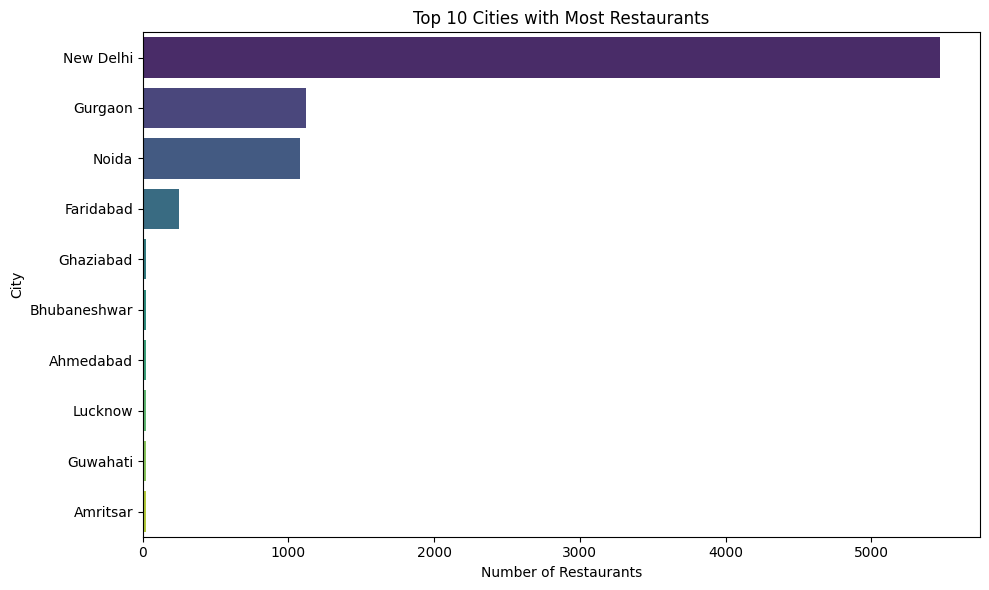

In [17]:
plt.figure(figsize=(10, 6))
city_counts = df['City'].value_counts().head(10)
sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.tight_layout()
plt.show()


In [18]:
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=5)

for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        popup=row['Restaurant Name'],
        color='blue',
        fill=True,
        fill_opacity=0.5
    ).add_to(restaurant_map)


restaurant_map.save("restaurant_map.html")
print("✅ Map saved as 'restaurant_map.html'. Open it to view geolocation visualization.")

✅ Map saved as 'restaurant_map.html'. Open it to view geolocation visualization.


In [19]:
city_stats = df.groupby('City').agg({
    'Aggregate rating': 'mean',
    'Price range': 'mean',
    'Restaurant Name': 'count'
}).rename(columns={'Restaurant Name': 'Number of Restaurants'}).sort_values(by='Number of Restaurants', ascending=False)

print("\n=== City-wise Restaurant Statistics (Top 10) ===")
print(city_stats.head(10))


=== City-wise Restaurant Statistics (Top 10) ===
              Aggregate rating  Price range  Number of Restaurants
City                                                              
New Delhi             2.438845     1.621597                   5473
Gurgaon               2.651431     1.855993                   1118
Noida                 2.036204     1.601852                   1080
Faridabad             1.866932     1.454183                    251
Ghaziabad             2.852000     1.800000                     25
Bhubaneshwar          3.980952     1.857143                     21
Guwahati              4.190476     2.523810                     21
Lucknow               4.195238     2.571429                     21
Ahmedabad             4.161905     2.571429                     21
Amritsar              3.685714     1.809524                     21


In [20]:
top_localities = df['Locality'].value_counts().head(5).index
locality_stats = df[df['Locality'].isin(top_localities)].groupby('Locality').agg({
    'Aggregate rating': 'mean',
    'Price range': 'mean',
    'Restaurant Name': 'count'
}).rename(columns={'Restaurant Name': 'Number of Restaurants'})

print("\n=== Top 5 Localities - Restaurant Summary ===")
print(locality_stats)


=== Top 5 Localities - Restaurant Summary ===
                 Aggregate rating  Price range  Number of Restaurants
Locality                                                             
Connaught Place          3.686885     2.598361                    122
Defence Colony           3.210465     1.930233                     86
Pitampura                2.870588     1.470588                     85
Rajouri Garden           3.591919     2.202020                     99
Shahdara                 1.413793     1.137931                     87
